In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb
import os

In [2]:
path_file=(r"C:\Users\Josue Florez\Documents\Maria Angelica\Proyectos\primertest.parquet")

In [3]:
data=pd.read_parquet(path_file)

In [4]:
data.head()

,Dept,City,Date,00_h,06_h,12_h,18_h,00_p,06_p,12_p,...,12_wd,18_wd,00_ws,06_ws,12_ws,18_ws,MinTemp_t,MaxTemp_t,rain_today,rain_tomorrow
793,AMAZONAS,LETICIA,2017-02-17,89.666664,96.666664,88.166664,77.800003,1000.683350,1001.899963,1003.316650,...,OSO,O,0.641667,0.936111,0.820000,1.251515,22.500000,33.400002,No,No
794,AMAZONAS,LETICIA,2017-02-18,92.333336,92.333336,94.833336,72.500000,999.266663,1002.000000,1003.066650,...,O,SE,0.436111,1.102778,1.247222,1.091667,22.100000,29.100000,No,No
795,AMAZONAS,LETICIA,2017-02-19,95.333336,96.166664,86.500000,79.000000,1001.116699,998.883301,1001.566650,...,SSO,SE,0.661111,0.594444,0.933333,1.250000,22.400000,31.200001,No,No
796,AMAZONAS,LETICIA,2017-02-20,94.666664,98.666664,95.000000,82.166664,1000.716614,1001.116699,1003.933350,...,S,ESE,0.586111,0.641667,1.414286,1.733333,23.799999,28.400000,No,No
797,AMAZONAS,LETICIA,2017-02-21,90.500000,98.833336,85.500000,63.833332,999.299988,1000.616699,1002.133301,...,O,O,0.369444,0.758333,1.294444,1.658333,23.500000,31.600000,No,No


In [5]:
data.describe()

,Date,00_h,06_h,12_h,18_h,00_p,06_p,12_p,18_p,00_r,...,00_t,06_t,12_t,18_t,00_ws,06_ws,12_ws,18_ws,MinTemp_t,MaxTemp_t
count,243860,243860.000000,243860.000000,243860.000000,243860.000000,243860.000000,243860.000000,243860.000000,243860.000000,243860.000000,...,243860.000000,243860.000000,243860.000000,243860.000000,243860.000000,243860.000000,243860.000000,243860.000000,243860.000000,243860.000000
mean,2020-02-12 02:32:34.445993728,81.728752,85.105446,76.580971,66.827156,863.431824,863.294373,864.613647,862.162354,2440.972177,...,19.179420,17.544722,20.382444,23.606171,1.836880,1.651043,2.184264,2.720267,16.541643,25.471292
min,2014-10-15 00:00:00,0.000000,0.000000,0.000000,0.000000,499.299957,499.299957,499.299957,499.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-09-30 00:00:00,77.416664,82.833336,71.393953,57.000000,757.110840,757.012497,757.929184,755.456284,0.000000,...,13.666667,11.983334,15.183333,18.100000,0.886111,0.772222,1.144444,1.508333,10.900000,20.123982
50%,2020-01-17 00:00:00,88.166664,92.541664,81.000000,69.666664,865.262482,865.133301,866.700012,864.466614,0.000000,...,19.699999,18.066668,20.875000,24.116667,1.311111,1.137143,1.572222,2.180556,17.067054,26.299999
75%,2021-07-28 00:00:00,95.000000,98.063128,88.620039,80.419300,992.200012,992.266663,994.066650,990.799988,205.000000,...,25.383333,23.760000,26.233332,29.800001,2.023611,1.771429,2.377778,3.200000,22.900000,31.500000
max,2024-10-14 00:00:00,100.000000,100.000000,100.000000,100.000000,1100.619873,1182.800049,1100.733276,1100.883423,550410.000000,...,44.799999,50.000000,47.950001,48.350002,76.671432,76.692856,79.900002,78.000000,39.000000,50.000000
std,NaN,21.002361,21.441963,19.606802,20.074633,119.296455,119.551720,119.717079,119.107910,17081.896694,...,6.802865,6.712909,6.576395,7.283596,2.335009,2.231378,2.453926,2.536215,6.840627,7.247904


In [6]:
data.describe(exclude=np.number)

,Dept,City,Date,00_wd,06_wd,12_wd,18_wd,rain_today,rain_tomorrow
count,243860,243860,243860,243860,243860,243860,243860,243860,243860
unique,31,235,NaN,15,15,15,15,2,2
top,CUNDINAMARCA,"BOGOTÁ, D.C.",NaN,SSO,SSO,S,S,No,No
freq,30057,3363,NaN,35255,36931,42093,30990,225957,226125
mean,NaN,NaN,2020-02-12 02:32:34.445993728,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2014-10-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2018-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2020-01-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2021-07-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,2024-10-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data['rain_today'] = data['rain_today'].map({'No': 0, 'Yes': 1})
data['rain_tomorrow'] = data['rain_tomorrow'].map({'No': 0, 'Yes': 1})

In [8]:
# Variable objetivo
y = data["rain_tomorrow"]

# Características (excluyendo la variable objetivo y otras no necesarias como 'date')
X = data.drop(columns=["rain_tomorrow", "Date","Dept",'City','00_wd','06_wd','12_wd','18_wd'])

In [9]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
encoder = LabelEncoder()

# Convertir las etiquetas
y = encoder.fit_transform(y)

# Verifica las clases codificadas
print(encoder.classes_)  # Debería mostrar ['No', 'Yes']


[0 1]


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Crear el modelo XGBoost
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Función de objetivo
    eval_metric='logloss',        # Métrica de evaluación
    learning_rate=0.1,            # Tasa de aprendizaje
    max_depth=6,                  # Profundidad máxima del árbol
    n_estimators=100,             # Número de árboles
    min_child_weight=1,           # Peso mínimo de los nodos
    subsample=0.8,                # Porción de datos usados por árbol
    colsample_bytree=0.8,         # Porción de características por árbol
    gamma=0.1,                    # Parámetro de regularización
    scale_pos_weight=1,  random_state=42)

evals_result = {}  # Diccionario para almacenar resultados de evaluación
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=False)

# Hacer predicciones
y_pred = model.predict(X_val)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.9413597966046092
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     45208
           1       0.85      0.24      0.37      3564

    accuracy                           0.94     48772
   macro avg       0.90      0.62      0.67     48772
weighted avg       0.94      0.94      0.93     48772



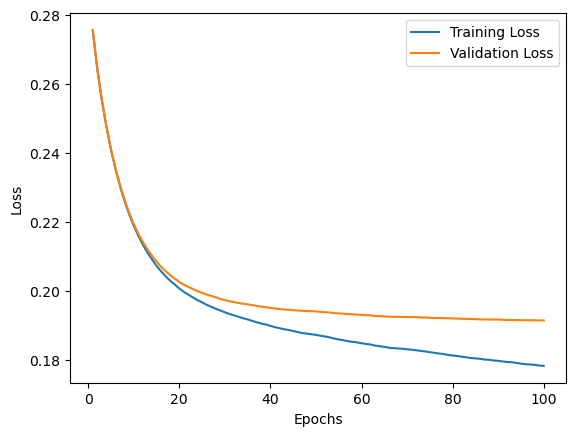

In [14]:
results = model.evals_result()

# Graficar
epochs = range(1, len(results['validation_0']['logloss']) + 1)
plt.plot(epochs, results['validation_0']['logloss'], label='Training Loss')
plt.plot(epochs, results['validation_1']['logloss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()